Model 1 - [0.0059808 1.        1.        1.        1.        1.       ]
Model 2 - [ 0.0059808  -0.15201655  1.          1.          1.          1.        ]
Model 3 - [-0.03805789 -0.15201656  0.01312108  1.          1.          1.        ]
Model 4 - [-0.03805785  0.14457677  0.01312107 -0.04910007  1.          1.        ]
Model 5 - [-3.66298672e-02  1.44576762e-01  1.17021934e-02 -4.91000685e-02
  1.64456911e-04  1.00000000e+00]
Model 6 - [-3.66298580e-02  1.22539532e+00  1.17021898e-02 -5.50393960e-01
  1.64457202e-04  4.48342261e-02]


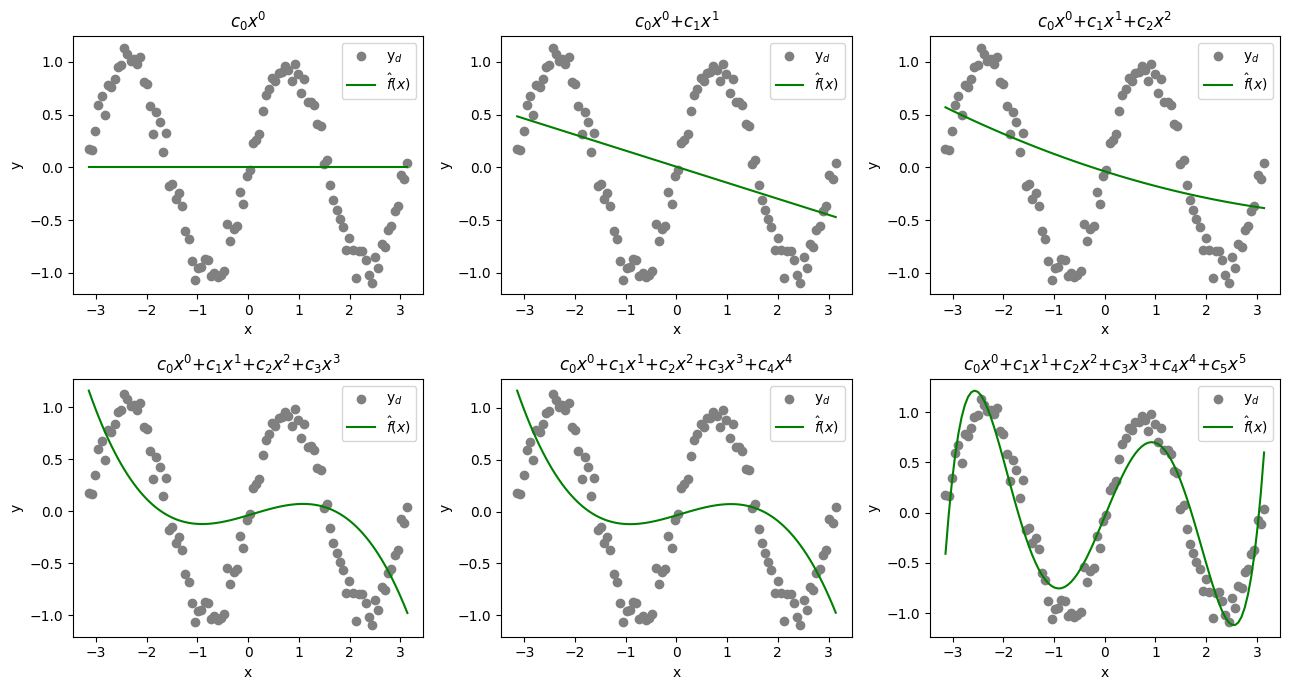

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generating synthetic data
np.random.seed(0)
x_data = np.linspace(-np.pi, np.pi, 100)
y_true = np.sin(2 * x_data)
y_data = y_true + 0.1 * np.random.normal(size=x_data.size)

# Model function
def model_p0(x, params):
    c0, c1, c2, c3, c4, c5 = params
    return c0 * np.ones_like(x)
def model_p1(x, params):
    c0, c1, c2, c3, c4, c5 = params
    return c0 + c1*x
def model_p2(x, params):
    c0, c1, c2, c3, c4, c5 = params
    return c0 + c1*x + c2*x**2
def model_p3(x, params):
    c0, c1, c2, c3, c4, c5 = params
    return c0 + c1*x + c2*x**2 + c3*x**3
def model_p4(x, params):
    c0, c1, c2, c3, c4, c5 = params
    return c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4
def model_p5(x, params):
    c0, c1, c2, c3, c4, c5 = params
    return c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4 + c5*x**5

# Objective function (sum of squared residuals)
def error_p0(params):
    residuals = y_data - model_p0(x_data, params)
    return np.sum(residuals**2)
def error_p1(params):
    residuals = y_data - model_p1(x_data, params)
    return np.sum(residuals**2)
def error_p2(params):
    residuals = y_data - model_p2(x_data, params)
    return np.sum(residuals**2)
def error_p3(params):
    residuals = y_data - model_p3(x_data, params)
    return np.sum(residuals**2)
def error_p4(params):
    residuals = y_data - model_p4(x_data, params)
    return np.sum(residuals**2)
def error_p5(params):
    residuals = y_data - model_p5(x_data, params)
    return np.sum(residuals**2)


fig, ax = plt.subplots(2, 3, figsize=(13, 7))

for idx, (model, error) in enumerate(zip([model_p0, model_p1, model_p2, model_p3, model_p4, model_p5], [error_p0, error_p1, error_p2, error_p3, error_p4, error_p5])):
    # Initial guess for the parameters
    initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
    # Minimization
    result = minimize(error, initial_guess)
    # Extracting the optimal parameters found by minimize
    c0_opt, c1_opt, c2_opt, c3_opt, c4_opt, c5_opt = result.x
    # Printing the results
    print(f'Model {idx+1} - {result.x}')
    ax[idx//3, idx%3].scatter(x_data, y_data, color='gray', label='y$_d$')
    ax[idx//3, idx%3].plot(x_data, model(x_data, result.x), color='green', label='$\hat{f}(x)$')
    ax[idx//3, idx%3].legend()
    ax[idx//3, idx%3].set_xlabel('x')
    ax[idx//3, idx%3].set_ylabel('y')
    #ax[idx//3, idx%3].set_title(f'Model {idx+1}')
    ax[idx//3, idx%3].set_title('+'.join([f'$c_{i}x^{i}$' for i in range(idx+1)]))
    
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


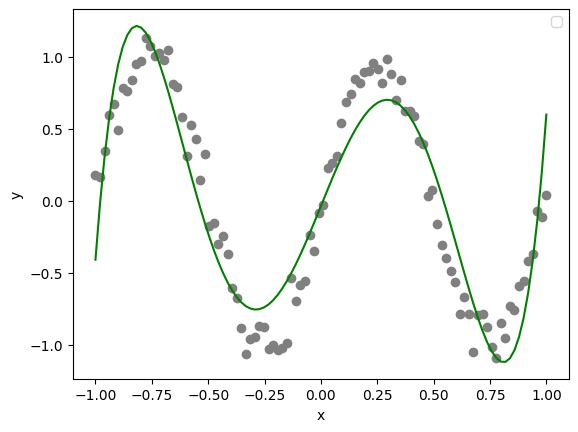

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generating synthetic data
np.random.seed(0)
x_data = np.linspace(-1, 1, 100)
y_true = np.sin(2 * np.pi * x_data)
y_data = y_true + 0.1 * np.random.normal(size=x_data.size)

# Model function
def model(x, params):
    c0, c1, c2, c3, c4, c5 = params
    return c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4 + c5*x**5

# Objective function (sum of squared residuals)
def loss(params):
    residuals = y_data - model(x_data, params)
    return np.sum(residuals**2)

initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
opt_parms = minimize(loss, initial_guess)
#c0_opt, a1_opt, a2_opt, a3_opt, a4_opt, a5_opt = opt_parms.x

fig, ax = plt.subplots(1, 1)
ax.scatter(x_data, y_data, color='gray')
ax.plot(x_data, model(x_data, opt_parms.x), color='green')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')   
plt.show()

w_0 = 8.188161569988573, b_0 = 8.268135339246157
w_1 = -7.405096347267076, b_1 = 3.6757533755682124
w_2 = 7.701058910397471, b_2 = -0.057553397647219194
w_3 = -7.43441033768435, b_3 = -3.7005989556753525
w_4 = 7.546276135359547, b_4 = -7.443650182458491


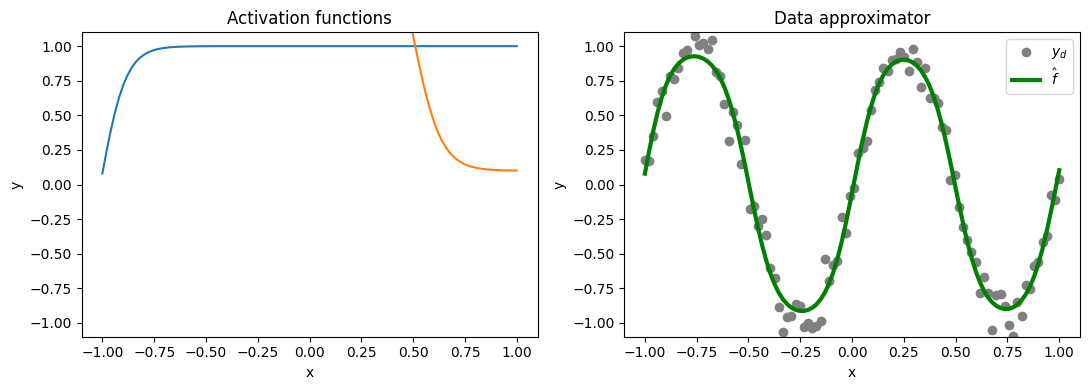

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generating synthetic data
np.random.seed(0)
x_data = np.linspace(-1, 1, 100)
y_true = np.sin(2 * np.pi * x_data)
y_data = y_true + 0.1 * np.random.normal(size=x_data.size)

def model(x, params):
    #First half of parms are weights, second half biases
    ws = params[:len(params)//2]
    bs = params[len(params)//2:]
    _output = 0
    for i in range(len(ws)):
        _output += np.tanh(ws[i]*x + bs[i])
    return _output

# Objective function (sum of squared residuals)
def loss(params):
    residuals = y_data - model(x_data, params)
    return np.sum(residuals**2)

n = 5
initial_guess_ws = np.resize([10,-10], n).tolist()
initial_guess_bs = np.linspace(-.1,.1,n).tolist()
initial_guess = initial_guess_ws + initial_guess_bs
opt_parms = minimize(loss, initial_guess)

ws = opt_parms.x[:len(opt_parms.x)//2]
bs = opt_parms.x[len(opt_parms.x)//2:]

fig, ax = plt.subplots(1, 2, figsize=(11,4))

ax[1].scatter(x_data, y_data, color='gray', label = "$y_d$")
ax[1].plot(x_data, model(x_data, opt_parms.x), color='green', lw=3, label="$\hat{f}$")
for i in range(len(opt_parms.x)//2):
    print(f'w_{i} = {ws[i]}, b_{i} = {bs[i]}')
    ax[0].plot(x_data, np.tanh(ws[i]*x_data + bs[i]) + 1.1*i)
    #ax[1].plot(x_data, np.tanh(ws[i]*x_data + bs[i]), ':', color='blue')

for a in ax:
    a.set_xlabel('x')
    a.set_ylabel('y')   
    a.set_ylim([-1.1, 1.1])
ax[1].legend()

ax[0].set_title('Activation functions')
ax[1].set_title('Data approximator')
plt.tight_layout()
plt.show()

w_0 = 8.188161569988573, b_0 = 8.268135339246157
w_1 = -7.405096347267076, b_1 = 3.6757533755682124
w_2 = 7.701058910397471, b_2 = -0.057553397647219194
w_3 = -7.43441033768435, b_3 = -3.7005989556753525
w_4 = 7.546276135359547, b_4 = -7.443650182458491


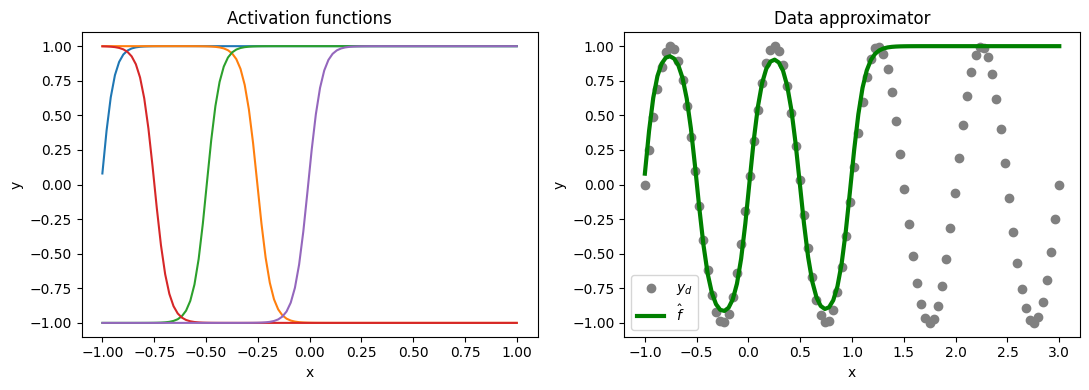

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generating synthetic data
np.random.seed(0)
x_data = np.linspace(-1, 1, 100)
y_true = np.sin(2 * np.pi * x_data)
y_data = y_true + 0.1 * np.random.normal(size=x_data.size)

def model(x, params):
    #First half of parms are weights, second half biases
    ws = params[:len(params)//2]
    bs = params[len(params)//2:]
    _output = 0
    for i in range(len(ws)):
        _output += np.tanh(ws[i]*x + bs[i])
    return _output

# Objective function (sum of squared residuals)
def loss(params):
    residuals = y_data - model(x_data, params)
    return np.sum(residuals**2)

n = 5
initial_guess_ws = np.resize([10,-10], n).tolist()
initial_guess_bs = np.linspace(-.1,.1,n).tolist()
initial_guess = initial_guess_ws + initial_guess_bs
opt_parms = minimize(loss, initial_guess)

ws = opt_parms.x[:len(opt_parms.x)//2]
bs = opt_parms.x[len(opt_parms.x)//2:]

x_data_test = np.linspace(-1, 3, 100)
y_data_test = np.sin(2 * np.pi * x_data_test)

fig, ax = plt.subplots(1, 2, figsize=(11,4))

ax[1].scatter(x_data_test, y_data_test, color='gray', label = "$y_d$")
ax[1].plot(x_data_test, model(x_data_test, opt_parms.x), color='green', lw=3, label="$\hat{f}$")
for i in range(len(opt_parms.x)//2):
    print(f'w_{i} = {ws[i]}, b_{i} = {bs[i]}')
    ax[0].plot(x_data, np.tanh(ws[i]*x_data_test + bs[i]))
    #ax[1].plot(x_data, np.tanh(ws[i]*x_data + bs[i]), ':', color='blue')

for a in ax:
    a.set_xlabel('x')
    a.set_ylabel('y')   
    a.set_ylim([-1.1, 1.1])
ax[1].legend()

ax[0].set_title('Activation functions')
ax[1].set_title('Data approximator')
plt.tight_layout()
plt.show()

w_0 = 949.1918354516207, b_0 = 124.88972015075997
w_1 = -15.854466558229545, b_1 = -10.011036295620476
w_2 = 21.2541670283106, b_2 = 5.318046798885644
w_3 = -27.37382496495045, b_3 = -6.730622308446961
w_4 = 11.142798942047461, b_4 = 10.239203181737706
w_5 = -18.034745792869185, b_5 = -6.916800114995409
w_6 = 134.71037540749896, b_6 = 5.466879380731343
w_7 = -20.613119906437092, b_7 = -10.446854295695795
w_8 = 711.404669224615, b_8 = -209.4772188136323
w_9 = -83.77558016635155, b_9 = -10.921603899950316
w_10 = 5.960759484889961, b_10 = 3.110172729276208
w_11 = -8.114140167824013, b_11 = 4.087438477838447
w_12 = 56.91202921551852, b_12 = -44.08623179888843
w_13 = -313.60315820995265, b_13 = 206.32271961619645
w_14 = 11.261151466198825, b_14 = 0.8113533357602318
w_15 = -99.45917715773776, b_15 = 118.24835507880564
w_16 = 34.37162148835849, b_16 = -8.51860592914024
w_17 = -731.3234824193713, b_17 = 36.86383316273347
w_18 = 11.089036658284142, b_18 = -10.14572956632676
w_19 = -5.9202254845

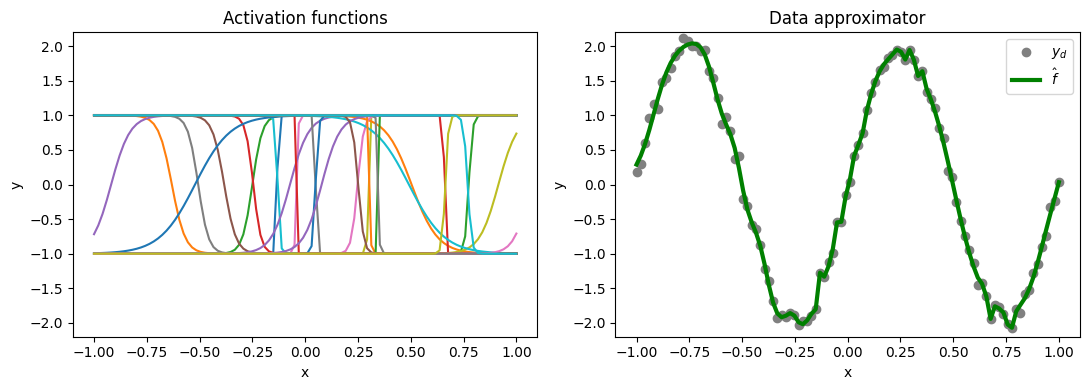

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generating synthetic data
np.random.seed(0)
x_data = np.linspace(-1, 1, 100)
y_true = 2*np.sin(2 * np.pi * x_data)
y_data = y_true + 0.1 * np.random.normal(size=x_data.size)

def model(x, params):
    #First half of parms are weights, second half biases
    ws = params[:len(params)//2]
    bs = params[len(params)//2:]
    _output = 0
    for i in range(len(ws)):
        _output += np.tanh(ws[i]*x + bs[i])
    return _output

# Objective function (sum of squared residuals)
def loss(params):
    residuals = y_data - model(x_data, params)
    return np.sum(residuals**2)

n = 30
initial_guess_ws = np.resize([10,-10], n).tolist()
initial_guess_bs = np.linspace(-.1,.1,n).tolist()
initial_guess = initial_guess_ws + initial_guess_bs
opt_parms = minimize(loss, initial_guess)

ws = opt_parms.x[:len(opt_parms.x)//2]
bs = opt_parms.x[len(opt_parms.x)//2:]

fig, ax = plt.subplots(1, 2, figsize=(11,4))

ax[1].scatter(x_data, y_data, color='gray', label = "$y_d$")
ax[1].plot(x_data, model(x_data, opt_parms.x), color='green', lw=3, label="$\hat{f}$")
for i in range(len(opt_parms.x)//2):
    print(f'w_{i} = {ws[i]}, b_{i} = {bs[i]}')
    ax[0].plot(x_data, np.tanh(ws[i]*x_data + bs[i]))
    #ax[1].plot(x_data, np.tanh(ws[i]*x_data + bs[i]), ':', color='blue')

for a in ax:
    a.set_xlabel('x')
    a.set_ylabel('y')   
    a.set_ylim([-2.2, 2.2])
ax[1].legend()

ax[0].set_title('Activation functions')
ax[1].set_title('Data approximator')
plt.tight_layout()
plt.show()

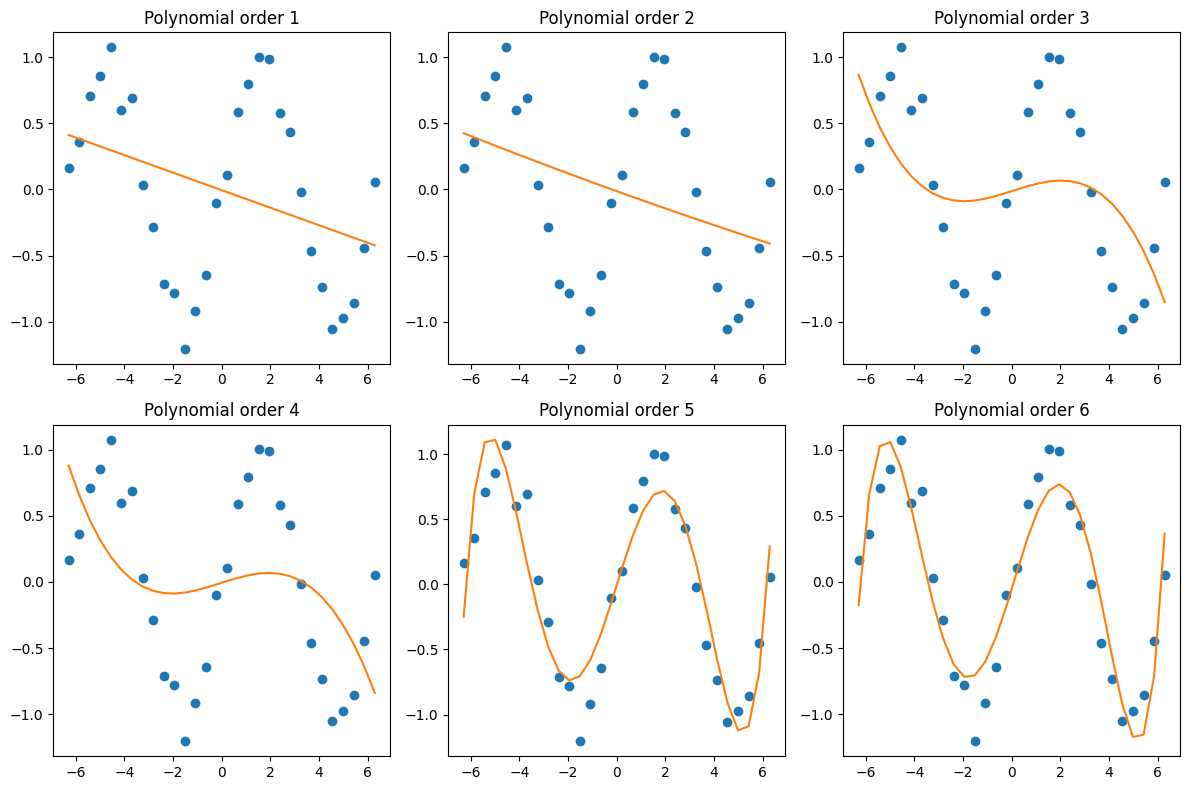

In [9]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(1)
x_d = np.linspace(-2*np.pi, 2*np.pi, 30)
y_d = np.sin(x_d) + np.random.normal(0, 0.1, x_d.shape)

plt.figure(figsize = (12, 8))
for i in range(1, 7):
    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')
plt.tight_layout()
plt.show()